In [10]:
!pip install wheel
!pip install pandas

## This scripts takes bags of words previously generated (using steps 2 to 4) to perform frequency analysis, generate a ConservationVSDisaster ratio and plot the time series

In [11]:
conservation = ['abatement', 'Recycling', 'durability','consistency', 'alleviate', 'enable', 'accommodate', 'handle', 'promote',
                'manage', 'conserve', 'maximize',  'unmodified','conservancy', 'ecological', 'exergy', 'conservation','balance', 'saving',
                'cultivation', 'reuse','development', 'low-carbon', 'sustainability', 'economy', 'implementation', 'planning', 'future',
                'development,', 'evolution', 'dominance','formation', 'regenerator', 'exploitation', 'lowcarbon', 'adoption', 'awareness',
               'development', 'flowering', 'germination',  'storing', 'growing', 'considerable','Territorial', 'continually',
                'mitigation', 'adaptation', 'agricultural', 'resource', 'manufacturing', 'moderation','ecosystems','preservation', 'nature', 
                'compatibility',  'availability', 'existence',  'progress','proliferation', 'reclaim', 'recover','extract', 'generate',
                'produce', 'replace', 'alleviate', 'deliver', 'regain','stored', 'relieve', 'keep', 'raise', 'maintain', 'regulate', 'adjust', 
                'resilience','resiliency', 'retrieve','activate', 'sustainable', 'low-carbon', 'sustainability', 'development,', 'planning', 
                'future', 'management','vegetation', 'climate',]


In [12]:
disaster = ['affect', 'alter', 'cause', 'alarm', 'uncomfortable','attack','dangers',  'diseases','droughts', 
          'unaffordable', 'burn','catastrophe','damage','risks', 'resist', 'harm', 'danger', 'death', 'COVID-19',
          'infections', 'deformation', 'stress','devastated',  'demolition', 'Fault','deprivation', 'destruction',
          'degradation', 'loss', 'detriment',  'war', 'devastation', 'difficulty', 'barriers','risks','disaster','endanger',
          'detrimental','toxic','hazard','deprivation','lethality','injury','peril','toughness','bothering']

In [13]:
## Here we collect the relevant data to generate a dataset with word frequencies
## For each text in the corpus, we collect author, year, title, and the tokenized text
## In this example author, year and title are expressed in the file name 

import os
from os import path

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file[-4:] and 'model' not in file:
            print(file)

            ## we can obtain author, year, title from filename
            author = file.split('-')[0]
            year = int(file.split('-')[1])
            title = file.split('-')[2]
            
            ## we get the full path and open the file
            name = os.path.join(path, file)
            file_text = open(name, encoding = 'utf-8',errors='ignore').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## store relevant info into a variable
            text_data = [author,year,title,tokenized_text]

            ## store the relevant data of each text into a general list of lists
            data_to_df += [text_data]

/content
almosawi-2020-Synergistic effect of.txt
bottarelli etal-2020-Solar gain.txt
sampedro etal-2016-Spanish.txt
chen etal-2012-Constructal.txt
wang-2014-Performanc.txt
shao etal-2015-Wireless Energy.txt
hundt and reddy-2011-Algal biodiesel product.txt
hamdy etal-2010-simulation based optimisation.txt
cuce and riffat-2016-A comprehensive assessment of sectoral energy.txt
wu etal-2011-Prediction.txt
spataru-2010-Domestic energy and occupancy.txt
Azad-2008-Split heat pipe heat.txt
patodi-2012-Performance.txt
rodrigues-2013-Anovel.txt
Mohammad etal-2020-wind farm.txt
knez etal-2014-A sustainable transport.txt
rao-2012-Thermodynamic.txt
fhazali etal-2017-Feasibility.txt
azad-2012-heat pipe heat exchanger.txt
Lazzarin etal-2013-annual air conditioning.txt
gupta etal-2019-analysis of.txt
ascione etal-2016-Design.txt
tiwari-2019-Entrans.txt
wang-2019-Performance.txt
Davies etal-2013-seawater.txt
agrawal-2011-Flow characteristics.txt
ghalamchi-2016-Evolving.txt
Vasiliev etal-2009-efficiency

In [14]:
len(data_to_df)

607

In [15]:
## Here we create the dataset using the list of lists created above
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text'])
  
# print dataframe.
df

author  ...                                     tokenized_text
0           almosawi  ...  [Synergistic, effect, of, ZnO, nanoparticles, ...
1    bottarelli etal  ...  [Solar, gain, mitigation, in, ventilated, tile...
2      sampedro etal  ...  [Spanish, photovoltaic, learning, curve, , ......
3          chen etal  ...  [Constructal, re-optimization, of, heat, condu...
4               wang  ...  [Performance, and, defrosting, effect, study, ...
..               ...  ...                                                ...
602        feng etal  ...  [Heating, load, and, COP, optimizations, for, ...
603         gao etal  ...  [Comparison, of, the, solar, PV, cooling, syst...
604         oliveira  ...  [A, novel, solar, façade, concept, for, energ...
605          Mojtaba  ...  [Sensitivity, analysis, of, technical, and, ec...
606           eicker  ...  [Large-scale, renewable, energy, integration, ...

[607 rows x 4 columns]

In [18]:
## First we install the potentially important packages

!pip install unidecode
!pip install word2number
!pip install contractions
!pip install bs4
!pip install nltk
!pip install inflect

     |████████████████████████████████| 235 kB 3.3 MB/s 
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=6599d0e416ef5ceb500b6f8b237ec0e45efaf88bcaac84b57dc21c81120765e1
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number
     |████████████████████████████████| 284 kB 5.1 MB/s 
     |████████████████████████████████| 321 kB 31.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85456 sha256=259b11e7da729844c7ff0ca24bb2eada14f898636caa30cb3b03e8565e0bc6c7
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [19]:
## we import all the modules
from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import contractions
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import inflect
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import json
## these are variables that our functions need
stop_words = set(stopwords.words('english'))
lemma=WordNetLemmatizer()
p = inflect.engine()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [20]:
## WE DEFINE ALL THE FUNCTIONS WE WILL NEED

## This function removes any mention to website 
## this application of re.sub() substitutes strings in the input starting with http with ''
def clean_url(input):
  output = re.sub(r'http\S+', '', input)
  return output

## This function fixes contractions - turns "don't" into "do not", or "can't" into "can not"
def fix_contraction(input):
  output = contractions.fix(input)
  return output

## This function finds all non-alphanumeric characters [^a-zA-Z] and substitutes them with '' 
def clean_non_alphanumeric(input):
  output = re.sub(r'[^a-zA-Z0-9]', ' ', input)
  return output

## This function finds all non-alphabetic characters [^a-zA-Z] and substitutes them with '' 
def clean_non_alphabetic(input):
  output = re.sub(r'[^a-zA-Z0-9]', ' ', input)
  return output

## This function takes a string with both lower and upper case elements and returns only lower case elements
def clean_lowercase(input):
  output = str(input).lower()
  return output

## The function tokenize takes a string as input and returns a list of tokens 
def clean_tokenization(input):
  output = word_tokenize(input)
  return output

## eliminate stop words
def clean_stopwords(input):
  output = [item for item in input if item not in stop_words]
  return output

## This function turns numeric values into words, "6" into "six"
def numbers_to_words(input):
  output =[]
  for item in input:
    if item.isnumeric()==True:
      output += [p.number_to_words(item)]
    else:
      output +=[item]
  return output

## Lemmatize tokens
def clean_lemmatization(input):
  output = [lemma.lemmatize(word=w, pos='v') for w in input]
  return output

## in this function we create a new list that includes only words with lenght > 2
def clean_length(input):
  output= [word for word in input if len(word) > 2]
  return output

## COUNT WORD FREQUENCIES
def count_word_frequencies(input):
  word_count = nltk.FreqDist(input)
  word_count_most_common= word_count.most_common()
  output = [(count[0],count[1]/len(input)) for count in word_count_most_common]
  return output

## finally, after al the filtering steps, we can put the string back together
def convert_to_string(input):
  output = ' '.join(input)
  return output


In [21]:
## We define the preprocessing pipeline as a function

def preprocessing(input):
  after_url_clean = clean_url(input)
  contractions_fixed = fix_contraction(after_url_clean)
  only_alphanumeric = clean_non_alphabetic(contractions_fixed)
  lower_cased = clean_lowercase(only_alphanumeric)
  tokenized = clean_tokenization(lower_cased)
  fixed_numbers = numbers_to_words(tokenized)
  without_stop_words = clean_stopwords(fixed_numbers)
  lemmatized = clean_lemmatization(without_stop_words)
  bigger_than_two = clean_length(lemmatized)
  word_frequencies = count_word_frequencies(bigger_than_two)
  filtered_string = convert_to_string(bigger_than_two)

  return(filtered_string)

In [22]:
## Create a column with clean text


df['CleanText'] = df['tokenized_text'].apply(str).apply(preprocessing)
df

author  ...                                          CleanText
0           almosawi  ...  synergistic effect zno nanoparticles organic c...
1    bottarelli etal  ...  solar gain mitigation ventilate tile roof use ...
2      sampedro etal  ...  spanish photovoltaic learn curve maria rosario...
3          chen etal  ...  constructal optimization heat conduction trian...
4               wang  ...  performance defrost effect study air water hea...
..               ...  ...                                                ...
602        feng etal  ...  heat load cop optimizations class generalize i...
603         gao etal  ...  comparison solar cool system cool systems yuhe...
604         oliveira  ...  novel solar fac ade concept energy polygenerat...
605          Mojtaba  ...  sensitivity analysis technical economic parame...
606           eicker  ...  large scale renewable energy integration withi...

[607 rows x 5 columns]

In [23]:
## Create a function to calculate word counts of a particular bag of words

from collections import Counter

def count_BOW(bag_of_words,tokenized_text):
  count_occurences_of_each_word = Counter(tokenized_text)
  print(count_occurences_of_each_word)

  total_bag_count = 0
  for word in bag_of_words:
    print(word, count_occurences_of_each_word[word])

    total_bag_count += count_occurences_of_each_word[word]
  return(total_bag_count)



In [24]:
count_BOW(['conservation','disaster','i'],df['tokenized_text'][0])

Counter({'the': 278, 'of': 239, 'and': 115, 'in': 103, '': 80, 'corrosion': 57, 'mild': 52, 'steel': 49, 'The': 47, 'inhibitor': 47, 'for': 42, 'to': 40, 'inhibition': 37, 'with': 36, 'on': 34, 'is': 34, 'a': 33, 'was': 32, 'ZnO': 29, 'surface': 27, 'at': 26, 'as': 25, 'by': 24, '1': 23, 'tested': 23, 'that': 21, 'Figure': 21, 'acid': 19, 'efficiency': 18, 'from': 18, 'et': 17, 'al.': 17, 'were': 16, 'M': 16, 'various': 16, '×': 16, 'presence': 16, 'which': 15, 'HCl': 15, 'solution': 15, 'studied': 15, 'oxide': 14, 'K': 14, 'immersion': 14, 'J': 14, 'are': 13, 'zinc': 13, 'nanoparticles': 12, 'concentration': 12, 'addition': 12, 'Journal': 12, 'adsorption': 12, 'concentrations': 11, 'this': 10, '3-((3-acetylphenyl)imino)indolin-2-one': 10, 'hydrochloric': 10, 'loss': 10, '8': 10, '10−3': 10, 'effect': 9, 'chemical': 9, 'has': 9, 'been': 9, 'have': 9, 'NPs': 9, 'solution.': 9, 'absence': 9, 'inhibitor.': 9, 'h.': 9, 'S,': 9, 'M,': 9, 'organic': 8, 'inhibitors': 8, 'molecules': 8, 'used'

0

In [25]:
## count all the words in each text pertaining to the bag of words conservation and disaster

list_conservation_counts=[]
list_disaster_counts=[]

for text in df['tokenized_text']:
  conservation_count = count_BOW(conservation, text)
  list_conservation_counts+=[conservation_count]

  disaster_count = count_BOW(disaster, text)
  list_disaster_counts+=[disaster_count]

Streaming output truncated to the last 5000 lines.
attack 0
dangers 0
diseases 0
droughts 0
unaffordable 0
burn 0
catastrophe 0
damage 0
risks 0
resist 0
harm 0
danger 0
death 0
COVID-19 0
infections 0
deformation 0
stress 1
devastated 0
demolition 0
Fault 0
deprivation 0
destruction 0
degradation 0
loss 1
detriment 0
war 0
devastation 0
difficulty 0
barriers 0
risks 0
disaster 0
endanger 0
detrimental 0
toxic 0
hazard 0
deprivation 0
lethality 0
injury 0
peril 0
toughness 0
bothering 0
Counter({'the': 175, 'of': 129, '': 122, 'and': 79, 'is': 78, 'in': 64, 'two-phase': 57, 'to': 50, 'viscosity': 49, 'capillary': 48, '\x02': 46, 'flow': 44, 'þ': 42, 'tube': 41, 'with': 39, 'on': 31, 'a': 31, 'CO2': 28, 'pressure': 27, '¼': 26, 'models': 25, 'as': 25, 'for': 24, 'are': 24, 'friction': 24, 'transcritical': 21, 'mg': 20, 'factor': 19, 'model': 19, 'The': 18, 'by': 18, 'et': 17, 'ml': 17, 'based': 16, 'proposed': 16, 'homogeneous': 15, 'al.': 15, '1': 14, 'employing': 14, 'phase': 14, 'the

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
barriers 0
risks 0
disaster 0
endanger 0
detrimental 0
toxic 0
hazard 0
deprivation 0
lethality 0
injury 0
peril 0
toughness 0
bothering 0
Counter({'of': 434, 'the': 362, 'solar': 200, 'and': 158, 'is': 147, '': 117, 'to': 111, 'in': 110, 'cost': 101, 'water': 90, 'for': 75, 'still': 69, 'desalination': 56, 'energy': 53, 'by': 53, 'a': 52, 'saline': 47, 'The': 46, 'from': 46, 'passive': 43, 'unit': 42, 'be': 40, 'It': 38, 'on': 36, 'analysis': 36, 'distillation': 32, 'with': 31, 'that': 31, 'as': 31, 'efficiency': 30, 'stills': 29, 'are': 29, 'have': 25, 'been': 25, 'annual': 25, 'productivity': 24, 'et': 23, 'al.': 23, 'capital': 22, 'systems': 20, 'still.': 20, 'has': 20, 'US$': 18, 'carbon': 18, 'exergy': 18, 'equivalent': 17, 'found': 17, 'economic': 17, 'using': 17, 'higher': 17, 'system': 17, 'Tiwari': 16, 'per': 16, 'average': 16, 'environmental': 15, 'this': 15, 'can': 15, 'degradation': 14, 'modified': 14, 'also': 14, 'payback

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
devastation 0
difficulty 0
barriers 0
risks 0
disaster 0
endanger 0
detrimental 0
toxic 0
hazard 0
deprivation 0
lethality 0
injury 0
peril 0
toughness 0
bothering 0
Counter({'the': 440, 'and': 298, 'of': 249, 'solar': 190, 'a': 118, 'in': 116, '': 107, 'to': 106, 'with': 93, 'thermal': 74, 'for': 64, 'is': 64, 'on': 58, 'energy': 52, 'concentrator': 52, 'by': 51, 'systems': 47, 'are': 44, 'temperature': 42, 'concentrators': 42, 'parabolic': 38, 'applications': 35, 'Energy': 34, 'receiver': 34, 'The': 33, 'an': 33, 'radiation': 33, 'tracking': 30, 'heat': 30, 'be': 28, 'collector': 28, 'et': 28, 'al.': 28, 'system': 27, 'performance': 26, 'Figure': 26, 'absorber': 26, 'can': 25, 'efficiency': 24, 'collectors': 24, 'Solar': 23, 'concentrating': 23, 'as': 22, 'CPC': 22, 'design': 21, 'from': 21, 'or': 21, 'trough': 21, 'that': 20, 'Fresnel': 20, 'optical': 19, 'International': 19, 'medium': 18, 'A': 18, 'water': 18, 'line': 18, 'have': 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
availability 1
existence 0
progress 0
proliferation 0
reclaim 0
recover 0
extract 0
generate 1
produce 1
replace 0
alleviate 0
deliver 0
regain 0
stored 0
relieve 0
keep 1
raise 0
maintain 0
regulate 0
adjust 0
resilience 0
resiliency 0
retrieve 0
activate 0
sustainable 0
low-carbon 0
sustainability 0
development, 1
planning 0
future 0
management 0
vegetation 0
climate 0
Counter({'the': 239, 'of': 164, 'and': 148, '': 105, 'is': 105, 'a': 101, 'to': 75, 'in': 67, 'for': 61, 'power': 51, 'The': 46, 'on': 37, 'heat': 36, 'with': 36, 'SF': 36, 'by': 35, 'hybrid': 31, 'solar': 29, 'were': 29, 'system': 27, 'steam': 27, 'was': 26, '1': 25, 'are': 25, 'it': 24, 'from': 24, 'as': 23, 'efficiency': 23, 'PB': 23, 'Case': 23, 'annual': 22, 'about': 21, 'energy': 20, 'costs': 20, 'Energy': 20, 'generation': 18, 'operation': 18, 'this': 17, 'boiler': 17, 'average': 17, 'et': 17, '2': 16, 'that': 16, 'at': 16, 'al.': 16, 'REELCOOP': 15, 'an': 15, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
formation 0
regenerator 0
exploitation 0
lowcarbon 0
adoption 0
awareness 0
development 0
flowering 0
germination 0
storing 0
growing 0
considerable 0
Territorial 0
continually 0
mitigation 0
adaptation 0
agricultural 0
resource 0
manufacturing 0
moderation 0
ecosystems 0
preservation 0
nature 0
compatibility 0
availability 0
existence 0
progress 0
proliferation 0
reclaim 0
recover 0
extract 0
generate 2
produce 0
replace 1
alleviate 0
deliver 0
regain 0
stored 2
relieve 0
keep 1
raise 0
maintain 3
regulate 0
adjust 1
resilience 0
resiliency 0
retrieve 0
activate 0
sustainable 0
low-carbon 0
sustainability 0
development, 0
planning 0
future 0
management 1
vegetation 0
climate 0
Counter({'the': 381, 'of': 249, 'and': 208, '': 163, 'is': 136, 'power': 95, 'The': 72, 'energy': 72, 'to': 67, 'capacity': 66, 'battery': 62, '=': 58, 'in': 46, 'storage': 45, 'allocation': 40, 'on': 40, 'a': 36, 'food': 36, 'by': 34, 'HESS': 33, 'for': 30, 'sy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
## Add the counts of bags of words to the dataFrame

df['conservation'] = list_conservation_counts
df['disaster'] = list_disaster_counts

df

author  year  ... conservation disaster
0           almosawi  2020  ...           13       10
1    bottarelli etal  2020  ...           14        1
2      sampedro etal  2016  ...           65        2
3          chen etal  2012  ...            7        0
4               wang  2014  ...           13        0
..               ...   ...  ...          ...      ...
602        feng etal  2010  ...            8        2
603         gao etal  2018  ...            7        0
604         oliveira  2016  ...           10        2
605          Mojtaba  2018  ...           34        4
606           eicker  2012  ...           67        0

[607 rows x 7 columns]

In [27]:
## Calculate a climate to damage ratio

df['conservatn-disaster'] = (df['conservation'] - df['disaster'])/(df['conservation'] + df['disaster'])

df

author  year  ... disaster conservatn-disaster
0           almosawi  2020  ...       10            0.130435
1    bottarelli etal  2020  ...        1            0.866667
2      sampedro etal  2016  ...        2            0.940299
3          chen etal  2012  ...        0            1.000000
4               wang  2014  ...        0            1.000000
..               ...   ...  ...      ...                 ...
602        feng etal  2010  ...        2            0.600000
603         gao etal  2018  ...        0            1.000000
604         oliveira  2016  ...        2            0.666667
605          Mojtaba  2018  ...        4            0.789474
606           eicker  2012  ...        0            1.000000

[607 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


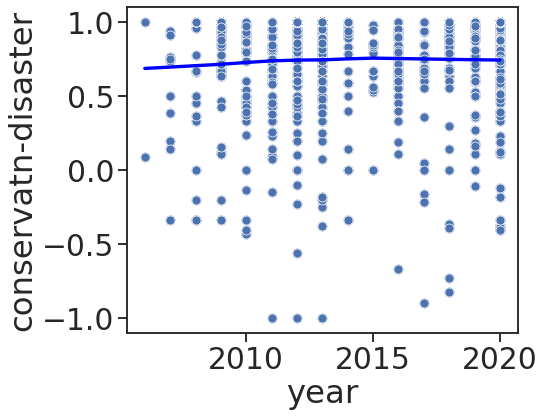

In [31]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df, lowess=True, line_kws={"color": "blue"}, x="year", y="conservatn-disaster")
sns.scatterplot(data=df, x="year", y="conservatn-disaster", ci=None);



In [32]:
new_df = df.drop(['tokenized_text', 'conservation','disaster'], axis=1)
new_df.to_csv('conservation_disaster.csv')